In [31]:
using Plots
using NCDatasets
using Glob

In [32]:
ds = NCDataset("/Users/maggiesengenberger/Documents/gcm_analysis/gcm_data/ecco_gud_20220616_0001/3d.0000000000.t001.nc")

NCDataset: /Users/maggiesengenberger/Documents/gcm_analysis/gcm_data/ecco_gud_20220616_0001/3d.0000000000.t001.nc
Group: /

Dimensions
   T = 51
   Zmd000001 = 1
   X = 1
   Y = 1

Variables
  T   (51)
    Datatype:    Float64
    Dimensions:  T
    Attributes:
     long_name            = model_time
     units                = seconds since 2000-01-01 00:00:00

  iter   (51)
    Datatype:    Int32
    Dimensions:  T
    Attributes:
     long_name            = iteration_count

  diag_levels   (1)
    Datatype:    Float64
    Dimensions:  Zmd000001
    Attributes:
     description          = Idicies of vertical levels within the source arrays

  X   (1)
    Datatype:    Float64
    Dimensions:  X
    Attributes:
     long_name            = X-coordinate of cell center
     units                = meters

  Y   (1)
    Datatype:    Float64
    Dimensions:  Y
    Attributes:
     long_name            = Y-Coordinate of cell center
     units                = meters

  TRAC01   (1 × 1 × 1 × 51

In [33]:
mfds = NCDataset(glob("Documents/gcm_analysis/gcm_data/ecco_gud_20220616_0001/3d.*.nc"))

NCDataset: Documents/gcm_analysis/gcm_data/ecco_gud_20220616_0001/3d.0000000000.t001.nc…Documents/gcm_analysis/gcm_data/ecco_gud_20220616_0001/3d.0000025920.t001.nc
Group: /

Dimensions
   T = 514
   Zmd000001 = 1
   X = 1
   Y = 1

Variables
  T   (514)
    Datatype:    Float64
    Dimensions:  T
    Attributes:
     long_name            = model_time
     units                = seconds since 2000-01-01 00:00:00

  iter   (514)
    Datatype:    Int32
    Dimensions:  T
    Attributes:
     long_name            = iteration_count

  diag_levels   (1)
    Datatype:    Float64
    Dimensions:  Zmd000001
    Attributes:
     description          = Idicies of vertical levels within the source arrays

  X   (1)
    Datatype:    Float64
    Dimensions:  X
    Attributes:
     long_name            = X-coordinate of cell center
     units                = meters

  Y   (1)
    Datatype:    Float64
    Dimensions:  Y
    Attributes:
     long_name            = Y-Coordinate of cell center
     uni

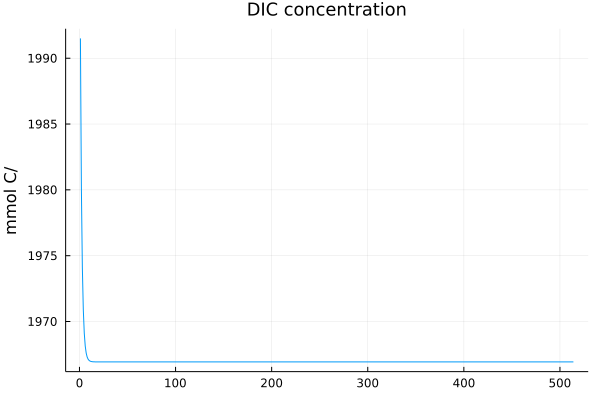

In [53]:
dic = mfds["TRAC01"]
dic_plot = plot(dic[1, 1, 1, :], title=dic.attrib["description"], legend=false, titlefontsize=12, ylabel=dic.attrib["units"])
display(dic_plot)

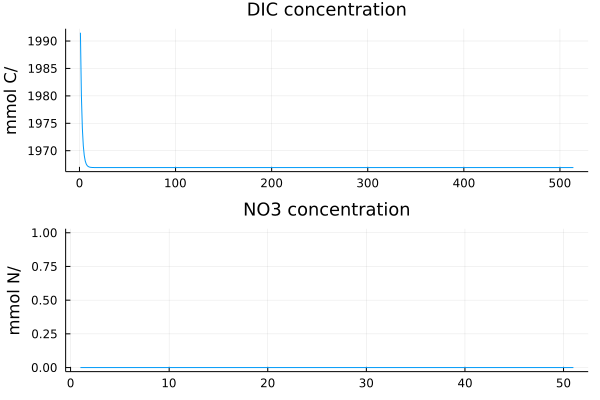

In [63]:
dic = mfds["TRAC01"]
dic_plot = plot(dic[1, 1, 1, :], title=dic.attrib["description"], legend=false, titlefontsize=12, ylabel=dic.attrib["units"])

two = ds["TRAC02"]
plot2 = plot(two[1, 1, 1, :], title=two.attrib["description"], legend=false, titlefontsize=12, ylabel=two.attrib["units"])

sanity_plot = plot(dic_plot, plot2, layout=(2,1))
display(sanity_plot)

In [72]:
nutr_tracs = String[]
for i = 1:20
    tracer_id = length(string(i)) < 2 ? "0"*string(i) : string(i)
    tracer_name = "TRAC"*tracer_id
    push!(nutr_tracs, tracer_name)
end
print(nutr_tracs)

["TRAC01", "TRAC02", "TRAC03", "TRAC04", "TRAC05", "TRAC06", "TRAC07", "TRAC08", "TRAC09", "TRAC10", "TRAC11", "TRAC12", "TRAC13", "TRAC14", "TRAC15", "TRAC16", "TRAC17", "TRAC18", "TRAC19", "TRAC20"]

In [99]:
function make_plots(dataset, filenames, tick_font, title_font)
    
    plot_array = Any[]
    
    for file in filenames
        data = dataset[file]
        data_plot = plot(data[1, 1, 1, :], title=data.attrib["description"], legend=false, xtickfontsize = tick_font, ytickfontsize = tick_font, xguidefontsize = title_font, yguidefontsize = title_font, titlefontsize=title_font, ylabel=data.attrib["units"])
        push!(plot_array, data_plot)
    end
    
    plot(plot_array...)
    
end

make_plots (generic function with 4 methods)

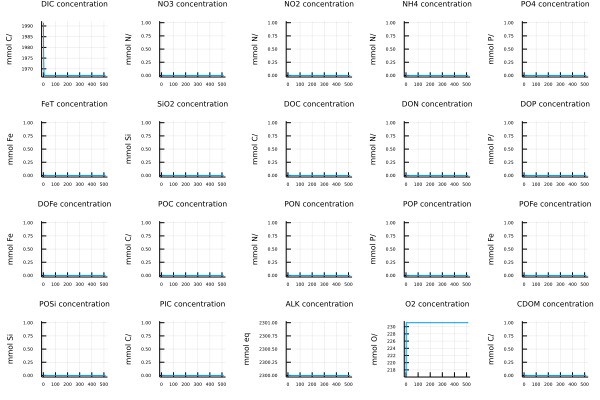

In [101]:
make_plots(mfds, nutr_tracs, 3, 5)

In [104]:
function get_tracers(start, stop, prefix)
    tracers = String[]
    for i = start:stop
        tracer_id = length(string(i)) < 2 ? "0"*string(i) : string(i)
        tracer_name = "TRAC"*tracer_id
        push!(tracers, tracer_name)
    end
    return tracers
end

get_tracers (generic function with 1 method)

In [105]:
plank_tracs = get_tracers(21, 70, "TRAC")
print(plank_tracs)

["TRAC21", "TRAC22", "TRAC23", "TRAC24", "TRAC25", "TRAC26", "TRAC27", "TRAC28", "TRAC29", "TRAC30", "TRAC31", "TRAC32", "TRAC33", "TRAC34", "TRAC35", "TRAC36", "TRAC37", "TRAC38", "TRAC39", "TRAC40", "TRAC41", "TRAC42", "TRAC43", "TRAC44", "TRAC45", "TRAC46", "TRAC47", "TRAC48", "TRAC49", "TRAC50", "TRAC51", "TRAC52", "TRAC53", "TRAC54", "TRAC55", "TRAC56", "TRAC57", "TRAC58", "TRAC59", "TRAC60", "TRAC61", "TRAC62", "TRAC63", "TRAC64", "TRAC65", "TRAC66", "TRAC67", "TRAC68", "TRAC69", "TRAC70"]

In [106]:
make_plots(mfds, plank_tracs, 2, 4)